In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Define the maze
maze = np.array([
    [0, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 2]  # '2' is the goal
])

In [4]:
# Parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 1000


In [5]:

# Initialize Q-table
num_states, num_actions = maze.size, 4
Q = np.zeros((num_states, num_actions))


In [6]:

# Define actions (Up, Down, Left, Right)
actions = ["Up", "Down", "Left", "Right"]

In [7]:
# Function to move the agent
def move(state, action):
    row, col = divmod(state, 4)
    if action == 0 and row > 0:  # Up
        row -= 1
    elif action == 1 and row < 3:  # Down
        row += 1
    elif action == 2 and col > 0:  # Left
        col -= 1
    elif action == 3 and col < 3:  # Right
        col += 1
    new_state = row * 4 + col
    return new_state



In [8]:
# Training loop
for _ in range(num_episodes):
    state = 0  # Starting position
    while True:
        # Epsilon-greedy action selection
        action = np.random.choice(num_actions) if np.random.uniform(0, 1) < epsilon else np.argmax(Q[state, :])
        new_state = move(state, action)
        reward = -1 if maze.flat[new_state] != 2 else 0  # Reward: 0 at goal, -1 otherwise
        # Update Q-value
        Q[state, action] += learning_rate * (reward + discount_factor * np.max(Q[new_state, :]) - Q[state, action])
        state = new_state
        if reward == 0:  # Goal state
            break


In [9]:

# Visualization of the agent's movement
def visualize_path(path):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, 4, 1))
    ax.set_yticks(np.arange(0, 4, 1))
    plt.grid()

    # Visualize maze with agent's path
    maze_display = np.copy(maze)
    for step in path:
        row, col = divmod(step, 4)
        maze_display[row, col] = 3  # Mark the agent's path

    ax.imshow(maze_display, cmap="cool", interpolation="nearest")

    # Add agent's path numbers on the grid
    for i in range(4):
        for j in range(4):
            if maze_display[i, j] == 3:
                ax.text(j, i, f'{i * 4 + j}', va='center', ha='center', color='black')

    plt.show()



Agent moved to state: 4
Agent moved to state: 8
Agent moved to state: 9
Agent moved to state: 10
Agent moved to state: 11
Agent moved to state: 15


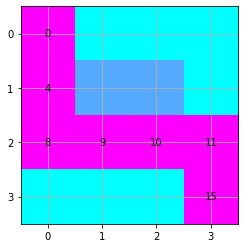

In [10]:
# Run the agent through the maze using the learned Q-values
current_state = 0
path = [current_state]
while current_state != 15:  # Goal state is 15 in 0-indexed 1D array
    action = np.argmax(Q[current_state, :])
    current_state = move(current_state, action)
    path.append(current_state)
    print(f"Agent moved to state: {current_state}")

# Visualize the agent's path in the maze
visualize_path(path)
